# Supervised Repertoire Classification

While solving a sequence classification can be useful in the cases where the label applies to every sequence in a sample (such as in tetramer-sorted T-cells), there are times where the label may truly only apply to a set of sequences. For example, in the case where one may sequence tumor-infiltrating lymphocytes (TIL) and  there is a label at the repertoire/sample level such as which therapy the sample received. In this case, there may be a structural signature within a set of sequences that is predictive but not every single sequence has that signature. This is a case where we want to learn what is the structural signature buried in a set of sequenes and which sequences carry this signature.

To demo this utility of a repertoire/sample level classifier, we will first upload dat from the Rudqvist dataseet. In this dataset, 20 mice with implanted tumors were treated with 4 modes of therapy (Control, 9H10, RT, or Combo). We want to know whether the TCRrepertoire from their tumors is predictive of the therapy they received.

In [1]:
import sys
sys.path.append('../../')
from DeepTCR.DeepTCR import DeepTCR_WF

# Instantiate training object
DTCR_WF = DeepTCR_WF('Tutorial')

#Load Data from directories
DTCR_WF.Get_Data(directory='../../Data/Rudqvist',Load_Prev_Data=False,aggregate_by_aa=True,
               aa_column_beta=1,count_column=2,v_beta_column=7,d_beta_column=14,j_beta_column=21)

Loading Data...
Embedding Sequences...
Data Loaded


Following loading the data, we will split our data into test/train and then train the model.

In [2]:
DTCR_WF.Get_Train_Valid_Test(test_size=0.25)
DTCR_WF.Train()

Training_Statistics: 
 Epoch: 1/10000 Training loss: 1.39742 Validation loss: 1.39744 Testing loss: 1.40735 Training Accuracy: 0.25 Validation Accuracy: 0.0 Testing Accuracy: 0.25 Testing AUC: 0.16667
Training_Statistics: 
 Epoch: 2/10000 Training loss: 1.37829 Validation loss: 1.39080 Testing loss: 1.40091 Training Accuracy: 0.16667 Validation Accuracy: 0.25 Testing Accuracy: 0.0 Testing AUC: 0.16667
Training_Statistics: 
 Epoch: 3/10000 Training loss: 1.36660 Validation loss: 1.38575 Testing loss: 1.39504 Training Accuracy: 0.5 Validation Accuracy: 0.25 Testing Accuracy: 0.25 Testing AUC: 0.25
Training_Statistics: 
 Epoch: 4/10000 Training loss: 1.35687 Validation loss: 1.38044 Testing loss: 1.38877 Training Accuracy: 0.41667 Validation Accuracy: 0.25 Testing Accuracy: 0.25 Testing AUC: 0.33333
Training_Statistics: 
 Epoch: 5/10000 Training loss: 1.34669 Validation loss: 1.37498 Testing loss: 1.38206 Training Accuracy: 0.58333 Validation Accuracy: 0.5 Testing Accuracy: 0.25 Testing A

Training_Statistics: 
 Epoch: 43/10000 Training loss: 0.49251 Validation loss: 1.08239 Testing loss: 0.88964 Training Accuracy: 0.91667 Validation Accuracy: 0.25 Testing Accuracy: 0.75 Testing AUC: 0.58333
Training_Statistics: 
 Epoch: 44/10000 Training loss: 0.45551 Validation loss: 1.07487 Testing loss: 0.87587 Training Accuracy: 0.91667 Validation Accuracy: 0.25 Testing Accuracy: 0.75 Testing AUC: 0.58333
Training_Statistics: 
 Epoch: 45/10000 Training loss: 0.41961 Validation loss: 1.07149 Testing loss: 0.86399 Training Accuracy: 0.91667 Validation Accuracy: 0.25 Testing Accuracy: 0.75 Testing AUC: 0.58333
Training_Statistics: 
 Epoch: 46/10000 Training loss: 0.38509 Validation loss: 1.06858 Testing loss: 0.85318 Training Accuracy: 0.91667 Validation Accuracy: 0.25 Testing Accuracy: 0.75 Testing AUC: 0.58333
Training_Statistics: 
 Epoch: 47/10000 Training loss: 0.35220 Validation loss: 1.06711 Testing loss: 0.84090 Training Accuracy: 0.91667 Validation Accuracy: 0.25 Testing Accura

Following training, we can view the performance through plotting the ROC curves.

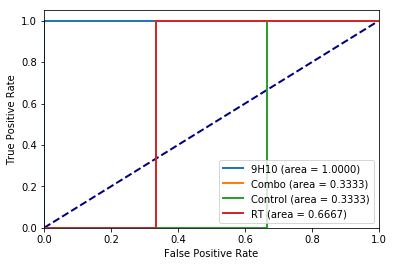

In [3]:
DTCR_WF.AUC_Curve()

You might notice that given how small this dataset is, doing one training split does not give us a good assesment for how predictive the TCR signature may be. In this case, we would want to use a K-fold cross validation to train on 19 of the samples and test on 1 and iterate until we've covered the entire cohort. When calling the K-fold cross validation command, one can provide the number of folds or if none is provided, it assumes a leave-one-out strategy.

In [4]:
%%capture
DTCR_WF.K_Fold_CrossVal()

We can then assess the performance once again through plotting the ROC curves.

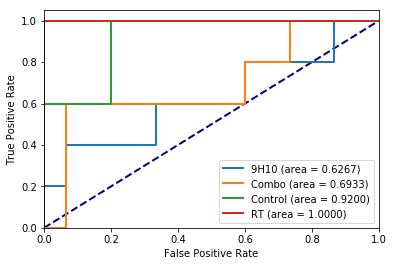

In [5]:
DTCR_WF.AUC_Curve()

Once our algorithm has been trained, we may want to see which sequences are the most strongly predicted for each label. To do this we will run the following command. The output of the command is a dictionary of dataframes within the object we can view. Additionally, these dataframes can be found in the results folder underneath the subdirectory 'Rep_Sequences'.

In [6]:
DTCR_WF.Representative_Sequences()

In [7]:
print(DTCR_WF.Rep_Seq['Control'])

      alpha            beta      v_beta      d_beta      j_beta v_alpha  \
11135  None      CASGDWEQYF  TCRBV13-02  unresolved  TCRBJ02-07    None   
14919  None    CASGAWGYEQYF  TCRBV13-02  unresolved  TCRBJ02-07    None   
13812  None    CASSDDRDEQYF  TCRBV13-01  unresolved  TCRBJ02-07    None   
11239  None    CASGAWGYEQYF  TCRBV13-02  unresolved  TCRBJ02-07    None   
10858  None    CASGAWGYEQYF  TCRBV13-02  unresolved  TCRBJ02-07    None   
15795  None    CASGAWGYEQYF  TCRBV13-02  unresolved  TCRBJ02-07    None   
16650  None    CASRAWGYEQYF  TCRBV13-02  unresolved  TCRBJ02-07    None   
16657  None  CASGLQMGKYEQYF  TCRBV13-02  unresolved  TCRBJ02-07    None   
13463  None    CESGAWGYEQYF  TCRBV13-02  unresolved  TCRBJ02-07    None   
13912  None   CASGDDSSYEQYF  TCRBV13-02  TCBDD01-01  TCRBJ02-07    None   

      j_alpha    Class         Sample      Freq  Counts          9H10  \
11135    None  Control  CONTROL-3.tsv  0.001773       2  4.833786e-08   
14919    None  Control  CONT

Furthermore, we may want to know which learned motifs are associated with a given label. To do this, we can run the following command with the label we want to know the predictive motifs for.

In [8]:
DTCR_WF.Motif_Identification('Control')

Motif Identification Completed


The motifs can then be found in fasta files in the results folder underneath (label)(alpha/beta)Motifs. These fasta fiels can then be used with "https://weblogo.berkeley.edu/logo.cgi" for motif visualization.

# Visualization

We can also visualize the learned latent space from the supervised repertoire classifier through plotting a UMAP representation of the sequences in two dimensions. This is called in the exact same way as the supervised sequence classifier. See that tutorial for more details on using this method.  

/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


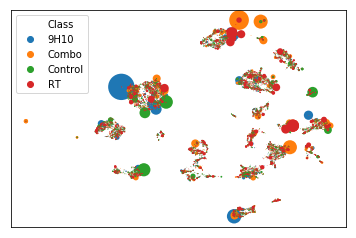

In [4]:
DTCR_WF.UMAP_Plot(by_class=True,freq_weight=True,scale=1000)

We can also visualize how the repertoires are related from this learned representation. This visualiztion is helpful when we want to compare how different TCR repertoires are related structurally. Once again, this is called in the same exact way as with the supervised sequence classifier. 

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 318.5557715892792 seconds
Jaccard graph constructed in 8.168781757354736 seconds
Wrote graph to binary file in 2.518364906311035 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.940873
Louvain completed 21 runs in 15.29308533668518 seconds
PhenoGraph complete in 344.6154270172119 seconds
Clustering Done


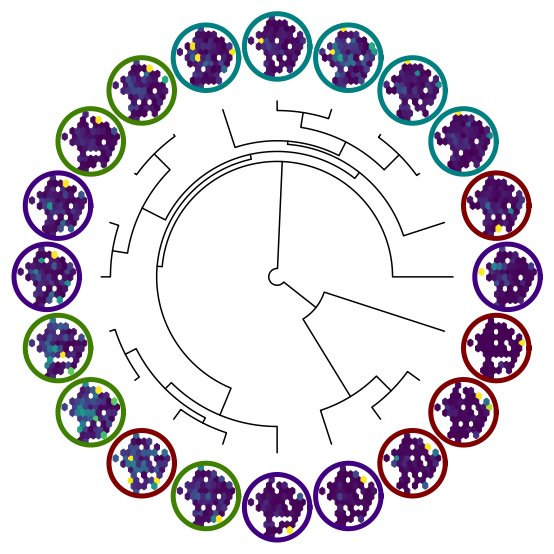

In [4]:
DTCR_WF.Repertoire_Dendrogram()

## "On-Graph" Clustering

We have also included an option within the supervised repertoire classifier which can improve performance in certain settings. This is an "on-graph" clustering method which learns a clustering solution guided by the supervised objective. The proportional use of this clustering solution is what is used to predict the label on the repertoire. To train DeepTCR with this option, we will set the 'on_graph_clustering' parameter to True.

In [5]:
%%capture
DTCR_WF.K_Fold_CrossVal(on_graph_clustering=True)

We can then assess performance via AUC.

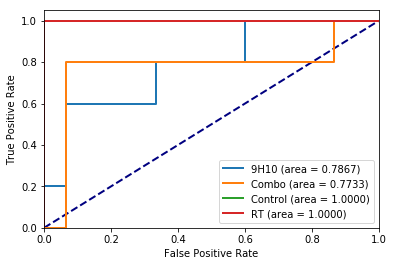

In [6]:
DTCR_WF.AUC_Curve()

We note improvements in classification accuracy, in particular for the 9H10 and Combo therapies.

Once again, we can view the repertoire dendrogram to see these samples in this new 'clustering' feature space.

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.6317877769470215 seconds
Jaccard graph constructed in 8.83785104751587 seconds
Wrote graph to binary file in 2.211638927459717 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.895275
Louvain completed 21 runs in 15.05308485031128 seconds
PhenoGraph complete in 26.806684732437134 seconds
Clustering Done


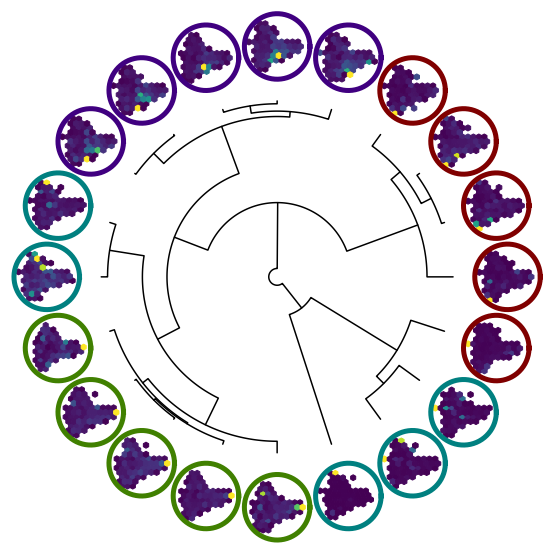

In [7]:
DTCR_WF.Repertoire_Dendrogram()

Let's change the granularity of the hexbins to better appreciate the distribution of the repertoire.

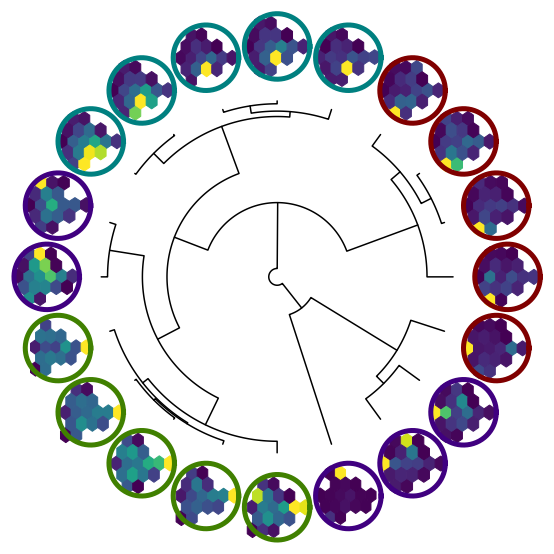

In [9]:
DTCR_WF.Repertoire_Dendrogram(Load_Prev_Data=True,gridsize=5)